In [1]:
## K-Center Testing
## Karan Vombatkere, Dec 2021

#Imports
import numpy as np

import sys, os
sys.path.append('../algorithms/')

import coreset_util as c_util
import coreset_kcenter as c_kcenter
import coreset_meb as c_meb
import coreset_median as c_median
import helper_functions as hf

import pandas as pd

In [2]:
#Function to import data from data folder
def import_dataset(dataset_name, col_list):
    '''
    Import input data from data folder
    Args:
        dataset_name: csv file name, stored in data folder
        col_list: list of columns to compute Coreset on
    '''
    coreset_data = c_util.Coreset_Util(dataset_name, col_list)
    test_data = coreset_data.X_array

    return test_data


#Code to run k-center implementation and return metrics
def run_kcenter(x_arr, k_val, epsilon):
    '''
    Test kcenter class and generate relevant metrics on input data
    Args:
        x_arr: input data - numpy ndarray
        k_val: k value for number of cluster centers
        epsilon: epsilon value
    '''
    #Initialize kcenter coreset object with parameters
    print("============================================================================")
    kcenter_obj = c_kcenter.Coreset_kCenter(x_arr, k_val, epsilon)
    computed_coreset = kcenter_obj.compute_kCenter_Coreset()

    kcenter_cost = kcenter_obj.R_val
    min_range = (1-epsilon)*kcenter_cost
    max_range = (1+epsilon)*kcenter_cost

    #Initialize kcenter coreset object with coreset
    print("---------------------------------------------------------------------------")
    print('Computing centers on Coreset')
    kcenter_coreset_obj = c_kcenter.Coreset_kCenter(computed_coreset, k_val, epsilon)
    kcenter_coreset_obj.greedy_kcenter()
    coreset_kcenter_cost = kcenter_coreset_obj.R_val

    print("(1+e) approximation range = [{:.1f}, {:.1f}]".format(min_range, max_range))

    return None
    



In [3]:
#Specify testing parameters
dataset_name = 'UNdata_CO2Emissions.csv'
col_list = ['Year', 'Value']
UN_data = import_dataset(dataset_name, col_list)

#Specify parameters
k = 6
epsilon = 0.4
num_iterations = 2


for i in range(num_iterations):
    #Run k-center
    run_kcenter(UN_data, k, epsilon)

Imported dataset: UNdata_CO2Emissions.csv
Subsetting Dataset to columns: ['Year', 'Value']
----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=6, epsilon=0.4, d=2
Cost (max) of k-center clustering=833933.4
Generated (k,epsilon) Center Coreset of size=84 on Input dimensions=(1247, 2)
Coreset computation time = 0.0 seconds
----------------------------------------------------------------------------------------------
---------------------------------------------------------------------------
Computing centers on Coreset
Cost (max) of k-center clustering=765239.5
(1+e) approximation range = [500360.0, 1167506.7]
----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=6, epsilon=0.4, d=2
Cost (max) of k-center clustering=780971.1
Generated (k,epsilon) Center Coreset of size=90 on Input dimensions=(1247, 2)
Coreset computation time = 0.0 seconds


In [4]:
# generate 3 gaussian clusters
rng = np.random.default_rng(12345)
n = 10000
k = 5
means1 = [[5, 5], [-5, -5], [0, 0]]
covs1 = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[7, 0], [0, 1]])]
gaussian_stream = hf.simulate_gaussian_clusters(rng, [3000, 2000, 5000], 3, means1, covs1)

In [5]:
gaussian_stream

array([[ 3.57617496,  6.26372846],
       [ 4.12933826,  4.74082677],
       [ 4.92465669,  4.25911535],
       ...,
       [ 1.93816926, -0.31513571],
       [ 3.87466199,  0.76893722],
       [ 2.16892291,  0.36802981]])

----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=3, epsilon=0.3, d=2
Cost (max) of k-center clustering=10.6


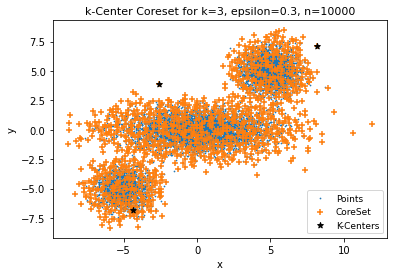

Generated (k,epsilon) Center Coreset of size=1195 on Input dimensions=(10000, 2)
Coreset computation time = 0.4 seconds
----------------------------------------------------------------------------------------------


In [6]:
#Test kcenter on synthetic random data
# x_arr = []
# for i in range(1000):
#     x_val, y_val, z_val = np.random.randint(-100,101), np.random.randint(-100,101), np.random.randint(-100,101)
#     x_arr.append([x_val, y_val, z_val])

test_kcenter = c_kcenter.Coreset_kCenter(gaussian_stream, 3, 0.3, True)
test_coreset = test_kcenter.compute_kCenter_Coreset()


Computed Minimum Enclosing Ball of size = 45


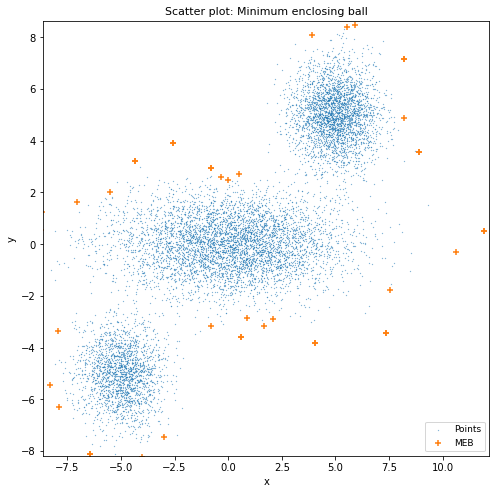

Minimum Enclosing Ball computation time = 5.7 seconds


In [7]:
#Test MEB on synthetic data
eps=0.02
plotting=True

meb_test = c_meb.Coreset_MinimumEnclosingBall(gaussian_stream, eps, plotting)
meb_test.compute_minimumEnclosingBall()

In [9]:
#Test median estimation
test_median = c_median.Coreset_Median(gaussian_stream, 0.002)
test_median.compute_median()

Length of input =  10000
Total elements checked = 501
Median value approximation = 0.7773947955302452
Median approximation computation time = 0.0007167449948610738 seconds
True Median = 0.7804663891427535
Numpy Median computation time = 0.001758726008119993 seconds
